## Import Library
I usually work on machine learning problems using sklearn, and additional libraries such as pandas for data manipulation, numpy for math problems, and matplotlib for visualization

In [5]:
import pandas as pd  # data processing, CSV file I/O
import matplotlib
import matplotlib.pyplot as plt # visualization
import seaborn as sns
import numpy as np # linear algebra
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Because this is a case of classification, then I will use model classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# The reason why I import so many models is because I will do hyperparameter tuning to find out which model has the best performance

import warnings
warnings.filterwarnings('ignore')

for i in [pd, matplotlib, sns, np, sklearn]:
    print(f'{str(i).split()[1]} : {i.__version__}')


'pandas' : 1.2.4
'matplotlib' : 3.3.4
'seaborn' : 0.11.1
'numpy' : 1.20.1
'sklearn' : 1.0.2


In [6]:
train_df = pd.read_csv('./dataset/train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test_df = pd.read_csv('./dataset/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
print(f'shape of training set {train_df.shape} & shape of test set {test_df.shape}')

shape of training set (891, 12) & shape of test set (418, 11)


In [9]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train_df_X = train_df.drop(columns='Survived')
train_df_y = train_df['Survived']
concat_df = pd.concat([train_df_X, test_df], axis='index')

In [14]:
concat_df_copy = concat_df.copy(deep=True)
concat_df_copy.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
concat_df_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
concat_df_copy.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [18]:
def df_unique(df):
    for col in df.columns:
        print(f'{col} : {df[col].unique()}')
df_unique(concat_df_copy)              

Pclass : [3 1 2]
Sex : ['male' 'female']
Age : [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6 9]
Fare : [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.47

In [19]:
med_age = concat_df_copy['Age'].median()
med_fare = concat_df_copy['Fare'].median()
mode_embarked = concat_df_copy['Embarked'].mode()

arr = [med_age, med_fare, mode_embarked.values[0]]
test = ['Age', 'Fare']

for mct in range(len(arr)):
    if mct == 2:
        print(f'mode of Embarked is {arr[mct]}')
    else:
        print(f'median of {test[mct]} is {arr[mct]}')


median of Age is 28.0
median of Fare is 14.4542
mode of Embarked is S


In [20]:
concat_df_copy = concat_df_copy.assign(
    Age = concat_df_copy['Age'].fillna(med_age),
    Fare = concat_df_copy['Fare'].fillna(med_fare),
    Embarked = concat_df_copy['Embarked'].fillna(mode_embarked.values[0]),
)

In [21]:
concat_df_copy.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df_unique(concat_df_copy)

Pclass : [3 1 2]
Sex : ['male' 'female']
Age : [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5   0.33
  0.17 38.5 ]
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6 9]
Fare : [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475 

In [23]:
concat_df_copy.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [24]:
lb_sex = LabelBinarizer()
concat_df_copy['Sex'] = lb_sex.fit_transform(concat_df_copy['Sex'])

In [25]:
concat_df_copy['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int32

In [26]:
lb_sex.classes_

array(['female', 'male'], dtype='<U6')

In [27]:
lb_sex.inverse_transform(np.array([0, 1]))

array(['female', 'male'], dtype='<U6')

In [28]:
concat_df_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,S
414,1,0,39.0,0,0,108.9000,C
415,3,1,38.5,0,0,7.2500,S
416,3,1,28.0,0,0,8.0500,S


In [29]:
concat_df_copy = pd.get_dummies(concat_df_copy, columns=['Embarked'])

In [30]:
concat_df_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,28.0,0,0,8.0500,0,0,1


In [31]:
concat_df_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,28.0,0,0,8.0500,0,0,1


In [32]:
df_unique(concat_df_copy)

Pclass : [3 1 2]
Sex : [1 0]
Age : [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5   0.33
  0.17 38.5 ]
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6 9]
Fare : [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      4

In [33]:
scaler = MinMaxScaler()
concat_df_copy[['Pclass', 'Age', 'Parch', 'Fare', 'SibSp']] = scaler.fit_transform(concat_df_copy[['Pclass', 'Age', 'Parch', 'Fare', 'SibSp']])

In [34]:
concat_df_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1,0.273456,0.125,0.000000,0.014151,0,0,1
1,0.0,0,0.473882,0.125,0.000000,0.139136,1,0,0
2,1.0,0,0.323563,0.000,0.000000,0.015469,0,0,1
3,0.0,0,0.436302,0.125,0.000000,0.103644,0,0,1
4,1.0,1,0.436302,0.000,0.000000,0.015713,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1.0,1,0.348616,0.000,0.000000,0.015713,0,0,1
414,0.0,0,0.486409,0.000,0.000000,0.212559,1,0,0
415,1.0,1,0.480145,0.000,0.000000,0.014151,0,0,1
416,1.0,1,0.348616,0.000,0.000000,0.015713,0,0,1


In [35]:
df_unique(concat_df_copy)

Pclass : [1.  0.  0.5]
Sex : [1 0]
Age : [0.27345609 0.473882   0.32356257 0.43630214 0.34861581 0.6743079
 0.02292371 0.33608919 0.17324314 0.04797695 0.72441438 0.24840286
 0.48640862 0.68683452 0.38619567 0.42377552 0.18576976 0.09808343
 0.23587624 0.49893524 0.82462733 0.52398848 0.26092948 0.22334962
 0.03545033 0.08555681 0.61167481 0.36114243 0.81210071 0.35487912
 0.06050357 0.13566328 0.56156833 0.210823   0.39872228 0.19829638
 0.31103595 0.00826757 0.37366905 0.4112489  0.28598271 0.29850933
 0.57409495 0.736941   0.88726043 0.46135538 0.58662157 0.17950645
 0.88099712 0.40498559 0.1481899  0.11061005 0.45509207 0.63672805
 0.69309783 0.50519855 0.54904171 0.01039709 0.76199424 0.69936114
 0.62420143 0.44882876 0.56783164 0.25466617 0.77452086 0.51146186
 0.64925467 0.78704748 0.29224602 0.00939496 0.53651509 0.74946762
 0.12313667 0.79957409 0.16071652 0.59914819 0.00726544 0.66178129
 0.71188776 1.         0.87473381 0.30477264 0.07303019 0.00626331
 0.37993236 0.00313165

In [36]:
new_train_df_scaler = concat_df_copy.iloc[:train_df.shape[0], :] 

In [37]:
model = ExtraTreesClassifier()
model.fit(new_train_df_scaler, train_df_y)

ExtraTreesClassifier()

In [38]:
features_df = pd.DataFrame(
    {
        'feature names': new_train_df_scaler.columns,
        'feature importances': model.feature_importances_
    },
).sort_values(
    by='feature importances', 
    ascending=False
).set_index(['feature names'])
features_df

,feature importances
feature names,
Sex,0.293755
Age,0.240227
Fare,0.236788
Pclass,0.109013
SibSp,0.047439
Parch,0.043197
Embarked_S,0.012367
Embarked_C,0.011820
Embarked_Q,0.005395


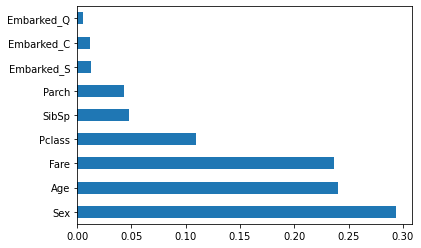

In [39]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=new_train_df_scaler.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [40]:
feature_importances_index = features_df[features_df['feature importances'] < 0.05].index.values
feature_importances_index

array(['SibSp', 'Parch', 'Embarked_S', 'Embarked_C', 'Embarked_Q'],
      dtype=object)

In [41]:
concat_df_copy.drop(columns=feature_importances_index, axis='columns', inplace=True)

In [42]:
concat_df_copy

,Pclass,Sex,Age,Fare
0,1.0,1,0.273456,0.014151
1,0.0,0,0.473882,0.139136
2,1.0,0,0.323563,0.015469
3,0.0,0,0.436302,0.103644
4,1.0,1,0.436302,0.015713
...,...,...,...,...
413,1.0,1,0.348616,0.015713
414,0.0,0,0.486409,0.212559
415,1.0,1,0.480145,0.014151
416,1.0,1,0.348616,0.015713


In [43]:
new_train_df = concat_df_copy.iloc[:891, :] 
new_test_df = concat_df_copy.iloc[891:, :]

In [44]:
new_train_df

,Pclass,Sex,Age,Fare
0,1.0,1,0.273456,0.014151
1,0.0,0,0.473882,0.139136
2,1.0,0,0.323563,0.015469
3,0.0,0,0.436302,0.103644
4,1.0,1,0.436302,0.015713
...,...,...,...,...
886,0.5,1,0.336089,0.025374
887,0.0,0,0.235876,0.058556
888,1.0,0,0.348616,0.045771
889,0.0,1,0.323563,0.058556


In [45]:
new_test_df

,Pclass,Sex,Age,Fare
0,1.0,1,0.430039,0.015282
1,1.0,0,0.586622,0.013663
2,0.5,1,0.774521,0.018909
3,1.0,1,0.336089,0.016908
4,1.0,0,0.273456,0.023984
...,...,...,...,...
413,1.0,1,0.348616,0.015713
414,0.0,0,0.486409,0.212559
415,1.0,1,0.480145,0.014151
416,1.0,1,0.348616,0.015713


In [46]:
model_params = {
    'svm': {
        'model': SVC(),
        'params': {
            'C': [1, 10, 20],
            'gamma': ['scale', 'auto'],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet'],
            'C': [1, 10, 20]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10],
            'criterion': ['gini', 'entropy'],
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [1, 2, 3, 4, 5]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 4, 5],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    },
    
}

model_list = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier()
]
# help(model_list[1])

In [47]:
scores = []
rs = ShuffleSplit(n_splits=5, test_size=.2)
for model_name, mp in model_params.items():
    clf = GridSearchCV(
        mp['model'],
        mp['params'],
        cv=rs,
        return_train_score=False
    )
    clf.fit(new_train_df, train_df_y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [48]:
cv_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
cv_df

,model,best_score,best_params
0,svm,0.807821,"{'C': 20, 'gamma': 'scale', 'kernel': 'poly'}"
1,LogisticRegression,0.791061,"{'C': 1, 'penalty': 'l2'}"
2,RandomForestClassifier,0.816760,"{'criterion': 'entropy', 'n_estimators': 10}"
3,DecisionTreeClassifier,0.816760,"{'criterion': 'gini', 'max_depth': 4, 'splitte..."
4,KNeighborsClassifier,0.815642,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '..."


In [49]:
count_class0, count_class1 = train_df_y.value_counts()
print(f'class 0: {count_class0} \nclass 1: {count_class1}')

class 0: 549 
class 1: 342


In [50]:
concat_df_trainXy = pd.concat([new_train_df, train_df_y], axis='columns')
class0_df = concat_df_trainXy[concat_df_trainXy['Survived'] == 0]
class1_df = concat_df_trainXy[concat_df_trainXy['Survived'] == 1]

class1_df_over = class1_df.sample(count_class0, replace=True)
train_sample_df = pd.concat([class0_df, class1_df_over], axis='index')

X = train_sample_df.drop(columns='Survived', axis='columns')
y = train_sample_df['Survived']

train_sample_df['Survived'].value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [51]:
scores = []
rs = ShuffleSplit(n_splits=5, test_size=.25)
for model_name, mp in model_params.items():
    clf = GridSearchCV(
        mp['model'],
        mp['params'],
        cv=rs,
        return_train_score=False
    )
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [52]:
cv_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
cv_df

,model,best_score,best_params
0,svm,0.800727,"{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}"
1,LogisticRegression,0.788364,"{'C': 20, 'penalty': 'l2'}"
2,RandomForestClassifier,0.865455,"{'criterion': 'gini', 'n_estimators': 10}"
3,DecisionTreeClassifier,0.797818,"{'criterion': 'entropy', 'max_depth': 5, 'spli..."
4,KNeighborsClassifier,0.865455,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh..."


In [53]:
cv_df.loc[2,'best_params']

{'criterion': 'gini', 'n_estimators': 10}

In [104]:
model = RandomForestClassifier(criterion= 'gini', n_estimators= 10)
model.fit(X, y)

RandomForestClassifier(n_estimators=10)

In [105]:
y_pred = model.predict(new_test_df)

In [106]:
s1 = pd.Series(y_pred, name='Survived')
s2 = test_df['PassengerId']
result = pd.concat([s2, s1],axis='columns')
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
correct_df = pd.read_csv('./dataset/gender_submission.csv')
correct_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [108]:
y_test = correct_df['Survived']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       266
           1       0.79      0.77      0.78       152

    accuracy                           0.84       418
   macro avg       0.83      0.82      0.83       418
weighted avg       0.84      0.84      0.84       418



In [109]:
y_test.to_numpy()

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [110]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [111]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[234,  32],
       [ 35, 117]], dtype=int64)

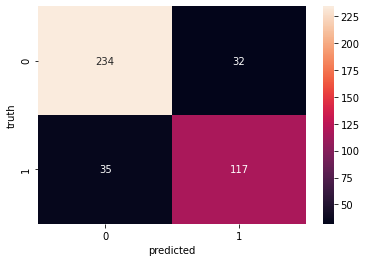

In [112]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [113]:
result.to_csv('predict_titanic_disaster.csv')